## Lab 3 - MiniMax algorithm

**Autor: Marcin Zwierzchowski**

In [1]:
import logging
import pandas as pd
from ttt import Game, build_player

## 1. Funkcja pomocnicza

In [2]:
def run_multiple_games(board_size, depth_limits, num_games, switch_players=False, all_combinations=False):
    data = []
    player1_sign =  "o"
    player2_sign =  "x"
    cases = set()

    for depth1 in depth_limits:
        for depth2 in depth_limits:
            player1_wins = 0
            player2_wins = 0
            draws = 0

            if not all_combinations:
                if ((depth1, depth2) in cases) or ((depth2, depth1) in cases):
                    continue

            for _ in range(num_games):
                player1 = build_player("minmax", player1_sign, depth1)
                player2 = build_player("minmax", player2_sign, depth2)

                if switch_players:
                    game = Game(board_size, player2, player1)
                else:
                    game = Game(board_size, player1, player2)

                
                result = game.run_game()

                if result == "o":
                    player1_wins += 1
                elif result == "x":
                    player2_wins += 1
                elif result is None:
                    draws += 1
                else:
                    raise ValueError(f"Unexpected result: {result}")

            data.append({
                "player1 depth": depth1,
                "player2 depth": depth2,
                "player1 % wins": player1_wins/(player1_wins+player2_wins+draws) * 100 ,
                "player2 % wins": player2_wins/(player1_wins+player2_wins+draws) * 100 ,
                "draws %": draws/(player1_wins+player2_wins+draws) * 100,
                "player1 wins": player1_wins,
                "player2 wins": player2_wins,
                "draws": draws
            })

            cases.add((depth1, depth2))

    return pd.DataFrame(data)

def highlight_rows(row):
    if row.name in [2, 6]:  # Highlight rows with index 2 and 6
        return ['background-color: darkblue'] * len(row)
    if row.name in [5, 7]:  # Highlight rows with index 2 and 6
        return ['background-color: darkgreen'] * len(row)
    if row.name in [1, 3]:  # Highlight rows with index 2 and 6
        return ['background-color: darkred'] * len(row)
    else:
        return [''] * len(row)

## 2. Testy

Założenia implementacji algorytmu minmax:

- przy poszukiwaniu najlepszego ruchu na danym poziomie rekurencji zapisywane są wszystkie równie dobre ruchy i ostatecznie losowo wybierany jest jeden z nich,

- heurystyczna funkcja oceny sytuacji w grze wygląda następująco:

plansza 3x3

        [3, 2, 3]
        [2, 4, 2]
        [3, 2, 3]
plansza 4x4

        [3, 2, 2, 3]
        [2, 3, 3, 2]
        [2, 3, 3, 2]
        [3, 2, 2, 3]

- algorytm przeszukuje możliwe ruchy zaczynając od tych najbardziej obiecujących. Umożliwia to wcześniejsze wykonanie odcięcia alfa-beta oraz znacząco przyspiesza czas działania algorytmu. Ruchy są sortowane względem ich wartości pochodzących z macierzy heurystyk powyżej



#### 2.1 Porównanie gracza min-max w starciu z graczem ludzkim w stosunku do gracza losowego

#### 2.1.1 Rozmiar planszy: 3x3

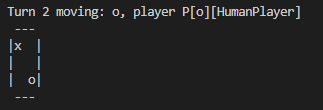
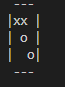
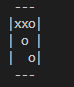
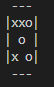
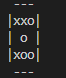
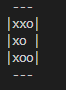

Gracz minmax z głębokością drzewa przeszukiwań = 9 potrafił zablokować mój ruch dający wygraną oraz potem sam wykorzystać moją nieuwagę i doprowadzić do wygranej. Jednak w innych partiach jego ruchu często wydawały się nie mieć uzasadnienia.

#### 2.1.2 Rozmiar planszy: 4x4

Gracz minmax z głębokością drzewa przeszukiwań = 9 na większej planszy jest trudniejszy do ogrania niż gracz, ponieważ czasami blokuje moje ruchy, jednak wciąż nie jest trudny do ogrania. Dla takiej planszy i tej głębokości nie dochodzi on do korzeni drzewa możliwych ruchów, tylko używa funkcji heurystycznej do oceny.

#### 2.2 Porównanie dwóch graczy min-max z różnymi głębokościami drzewa przeszukiwań 

#### 2.2.1 Rozmiar planszy: 3x3

In [3]:
board_size = 3
depth_limits = [1, 6 , 9]
num_games = 50

results = run_multiple_games(board_size, depth_limits, num_games, switch_players=False)


Turn 0 moving: o, player P[o][MinMaxPlayer]
 --- 
|   |
|   |
|   |
 --- 

Number of prunings for this move: 0

Turn 1 moving: x, player P[x][MinMaxPlayer]
 --- 
|   |
|  o|
|   |
 --- 

Number of prunings for this move: 0

Turn 2 moving: o, player P[o][MinMaxPlayer]
 --- 
|   |
| xo|
|   |
 --- 

Number of prunings for this move: 0

Turn 3 moving: x, player P[x][MinMaxPlayer]
 --- 
|   |
|oxo|
|   |
 --- 

Number of prunings for this move: 0

Turn 4 moving: o, player P[o][MinMaxPlayer]
 --- 
|  x|
|oxo|
|   |
 --- 

Number of prunings for this move: 0

Turn 5 moving: x, player P[x][MinMaxPlayer]
 --- 
|  x|
|oxo|
| o |
 --- 

Number of prunings for this move: 0

Turn 6 moving: o, player P[o][MinMaxPlayer]
 --- 
|  x|
|oxo|
|xo |
 --- 

RESULT:x:P[x][MinMaxPlayer]
Time played: {'o': 0.0, 'x': 1.0116100311279297}

Turn 0 moving: o, player P[o][MinMaxPlayer]
 --- 
|   |
|   |
|   |
 --- 

Number of prunings for this move: 0

Turn 1 moving: x, player P[x][MinMaxPlayer]
 --- 
|   |
|o  |


In [4]:
results.style.format("{:.0f}")  # .apply(highlight_rows, axis=1)

,player1 depth,player2 depth,player1 % wins,player2 % wins,draws %,player1 wins,player2 wins,draws
0,1,1,0,100,0,0,50,0
1,1,6,54,46,0,27,23,0
2,1,9,38,62,0,19,31,0
3,6,6,72,22,6,36,11,3
4,6,9,60,34,6,30,17,3
5,9,9,56,42,2,28,21,1


Przy takiej samej głębokości drzewa przeszukiwań dla obu graczy min-max to ten zaczynający jako drugi zawsze wygrywa. Inaczej wygląda sytuacja, gdy głębokości dla obu graczy wciąż są takie same i wynoszą po 6. Wtedy to gracz numer 1 (zaczynający) dominuje, wygrywając 80% gier. Gdy głębokości wynoszą po 9, również widać przewagę gracza numer 1, lecz już nie tak znacząca.

Co ciekawe, wyniki dla innych symulacji pokazują, że głębokość drzewa przeszukiwań nie masz widocznego wpływu na rezultat. Spodziewać by się można było, że gracz z większą głębokością powinien dominować, jednak tak nie jest. Szczególnie w przypadku numer 2, gdzie jeden graczy ma maksymalne drzewo przeszukiwań i "widzi" zakończenia partii.  

#### 2.2.2 Rozmiar planszy: 4x4

In [5]:
board_size = 4
depth_limits = [1, 3 , 6]
num_games = 20

results3 = run_multiple_games(board_size, depth_limits, num_games, switch_players=False)


Turn 0 moving: o, player P[o][MinMaxPlayer]
 ---- 
|    |
|    |
|    |
|    |
 ---- 

Number of prunings for this move: 0

Turn 1 moving: x, player P[x][MinMaxPlayer]
 ---- 
|    |
|    |
|    |
|  o |
 ---- 

Number of prunings for this move: 0

Turn 2 moving: o, player P[o][MinMaxPlayer]
 ---- 
|    |
|    |
|    |
|  ox|
 ---- 

Number of prunings for this move: 0

Turn 3 moving: x, player P[x][MinMaxPlayer]
 ---- 
|    |
|    |
|o   |
|  ox|
 ---- 

Number of prunings for this move: 0

Turn 4 moving: o, player P[o][MinMaxPlayer]
 ---- 
|    |
| x  |
|o   |
|  ox|
 ---- 

Number of prunings for this move: 0

Turn 5 moving: x, player P[x][MinMaxPlayer]
 ---- 
|    |
|ox  |
|o   |
|  ox|
 ---- 

Number of prunings for this move: 0

Turn 6 moving: o, player P[o][MinMaxPlayer]
 ---- 
|   x|
|ox  |
|o   |
|  ox|
 ---- 

Number of prunings for this move: 0

Turn 7 moving: x, player P[x][MinMaxPlayer]
 ---- 
|   x|
|ox  |
|o  o|
|  ox|
 ---- 

Number of prunings for this move: 0

Turn 8 

In [6]:
results3.style.format("{:.0f}")#.apply(highlight_rows, axis=1)

,player1 depth,player2 depth,player1 % wins,player2 % wins,draws %,player1 wins,player2 wins,draws
0,1,1,0,100,0,0,20,0
1,1,3,0,95,5,0,19,1
2,1,6,5,45,50,1,9,10
3,3,3,15,20,65,3,4,13
4,3,6,15,0,85,3,0,17
5,6,6,60,5,35,12,1,7


W tym przypadku dla głębokości przeszukiwań obu graczy równej 1 również zawsze wygrywa gracz drugi. Gdy głębokości wynoszą po 3 gracze remisują 60% gier i wygrywają po taką samą ilość. Gdy głębokości wynoszą po 6 widać nieznaczną przewagą gracza 1, lecz nie jest to dominacja. 

Dla symulacji numer 1 i 2, gdy jeden z graczy może przeszukiwać na znacznie większą głębokość niż przeciwnik dostrzegalny jest wpływ właśnie tego parametru, który daje wygrane. Jednak w przypadku, kiedy zmniejszymy różnicę wpływ tego parametru przestaje być widoczny - gra numer 4. 

Dla planszy 4x4 czas działania algorytmu znacząco wydłużył się. Warto pamiętać, że mimo odcinania alfa-beta algorytm ten może wielokrotnie analizować te same stany. Nie jest bowiem uwzględniane to, że do konkretnego stanu może również dochodzić inna, wcześniej rozważana, sekwencja ruchów. 

